# Assignment 1 - Concrete Compressive Strength

## 1. Data Exploration

### 1.1 Loading data

In [1]:
import numpy as np
import pandas as pd

xl = pd.ExcelFile('Concrete_Data.xls')
concrete = xl.parse('Sheet1')

### 1.2 Exploratory data analysis

In [2]:
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


This dataset contains many samples of concrete with different compositions as well as the age of the concrete and the compressive strength.

Features: cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, fine aggregate, and age. 

Target: concrete compressive strength.

In [3]:
new_columns = ['cement', 'slag', 'ash', 'water', 'superplastizer', 'coarseagg', 'fineagg', 'age', 'strength']
concrete.columns = new_columns
concrete.head()

,cement,slag,ash,water,superplastizer,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Here I renamed the columns since they are too wordy.

In [4]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cement          1030 non-null   float64
 1   slag            1030 non-null   float64
 2   ash             1030 non-null   float64
 3   water           1030 non-null   float64
 4   superplastizer  1030 non-null   float64
 5   coarseagg       1030 non-null   float64
 6   fineagg         1030 non-null   float64
 7   age             1030 non-null   int64  
 8   strength        1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


This dataset contains 1030 samples of concrete. All of the data are numerical (float and long integers).

In [5]:
concrete.describe()

,cement,slag,ash,water,superplastizer,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


Above is just statistical measurements on the given dataset.

### 1.3 Visualize correlation between features and compressive strength

c:\Users\shahr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shahr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shahr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shahr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

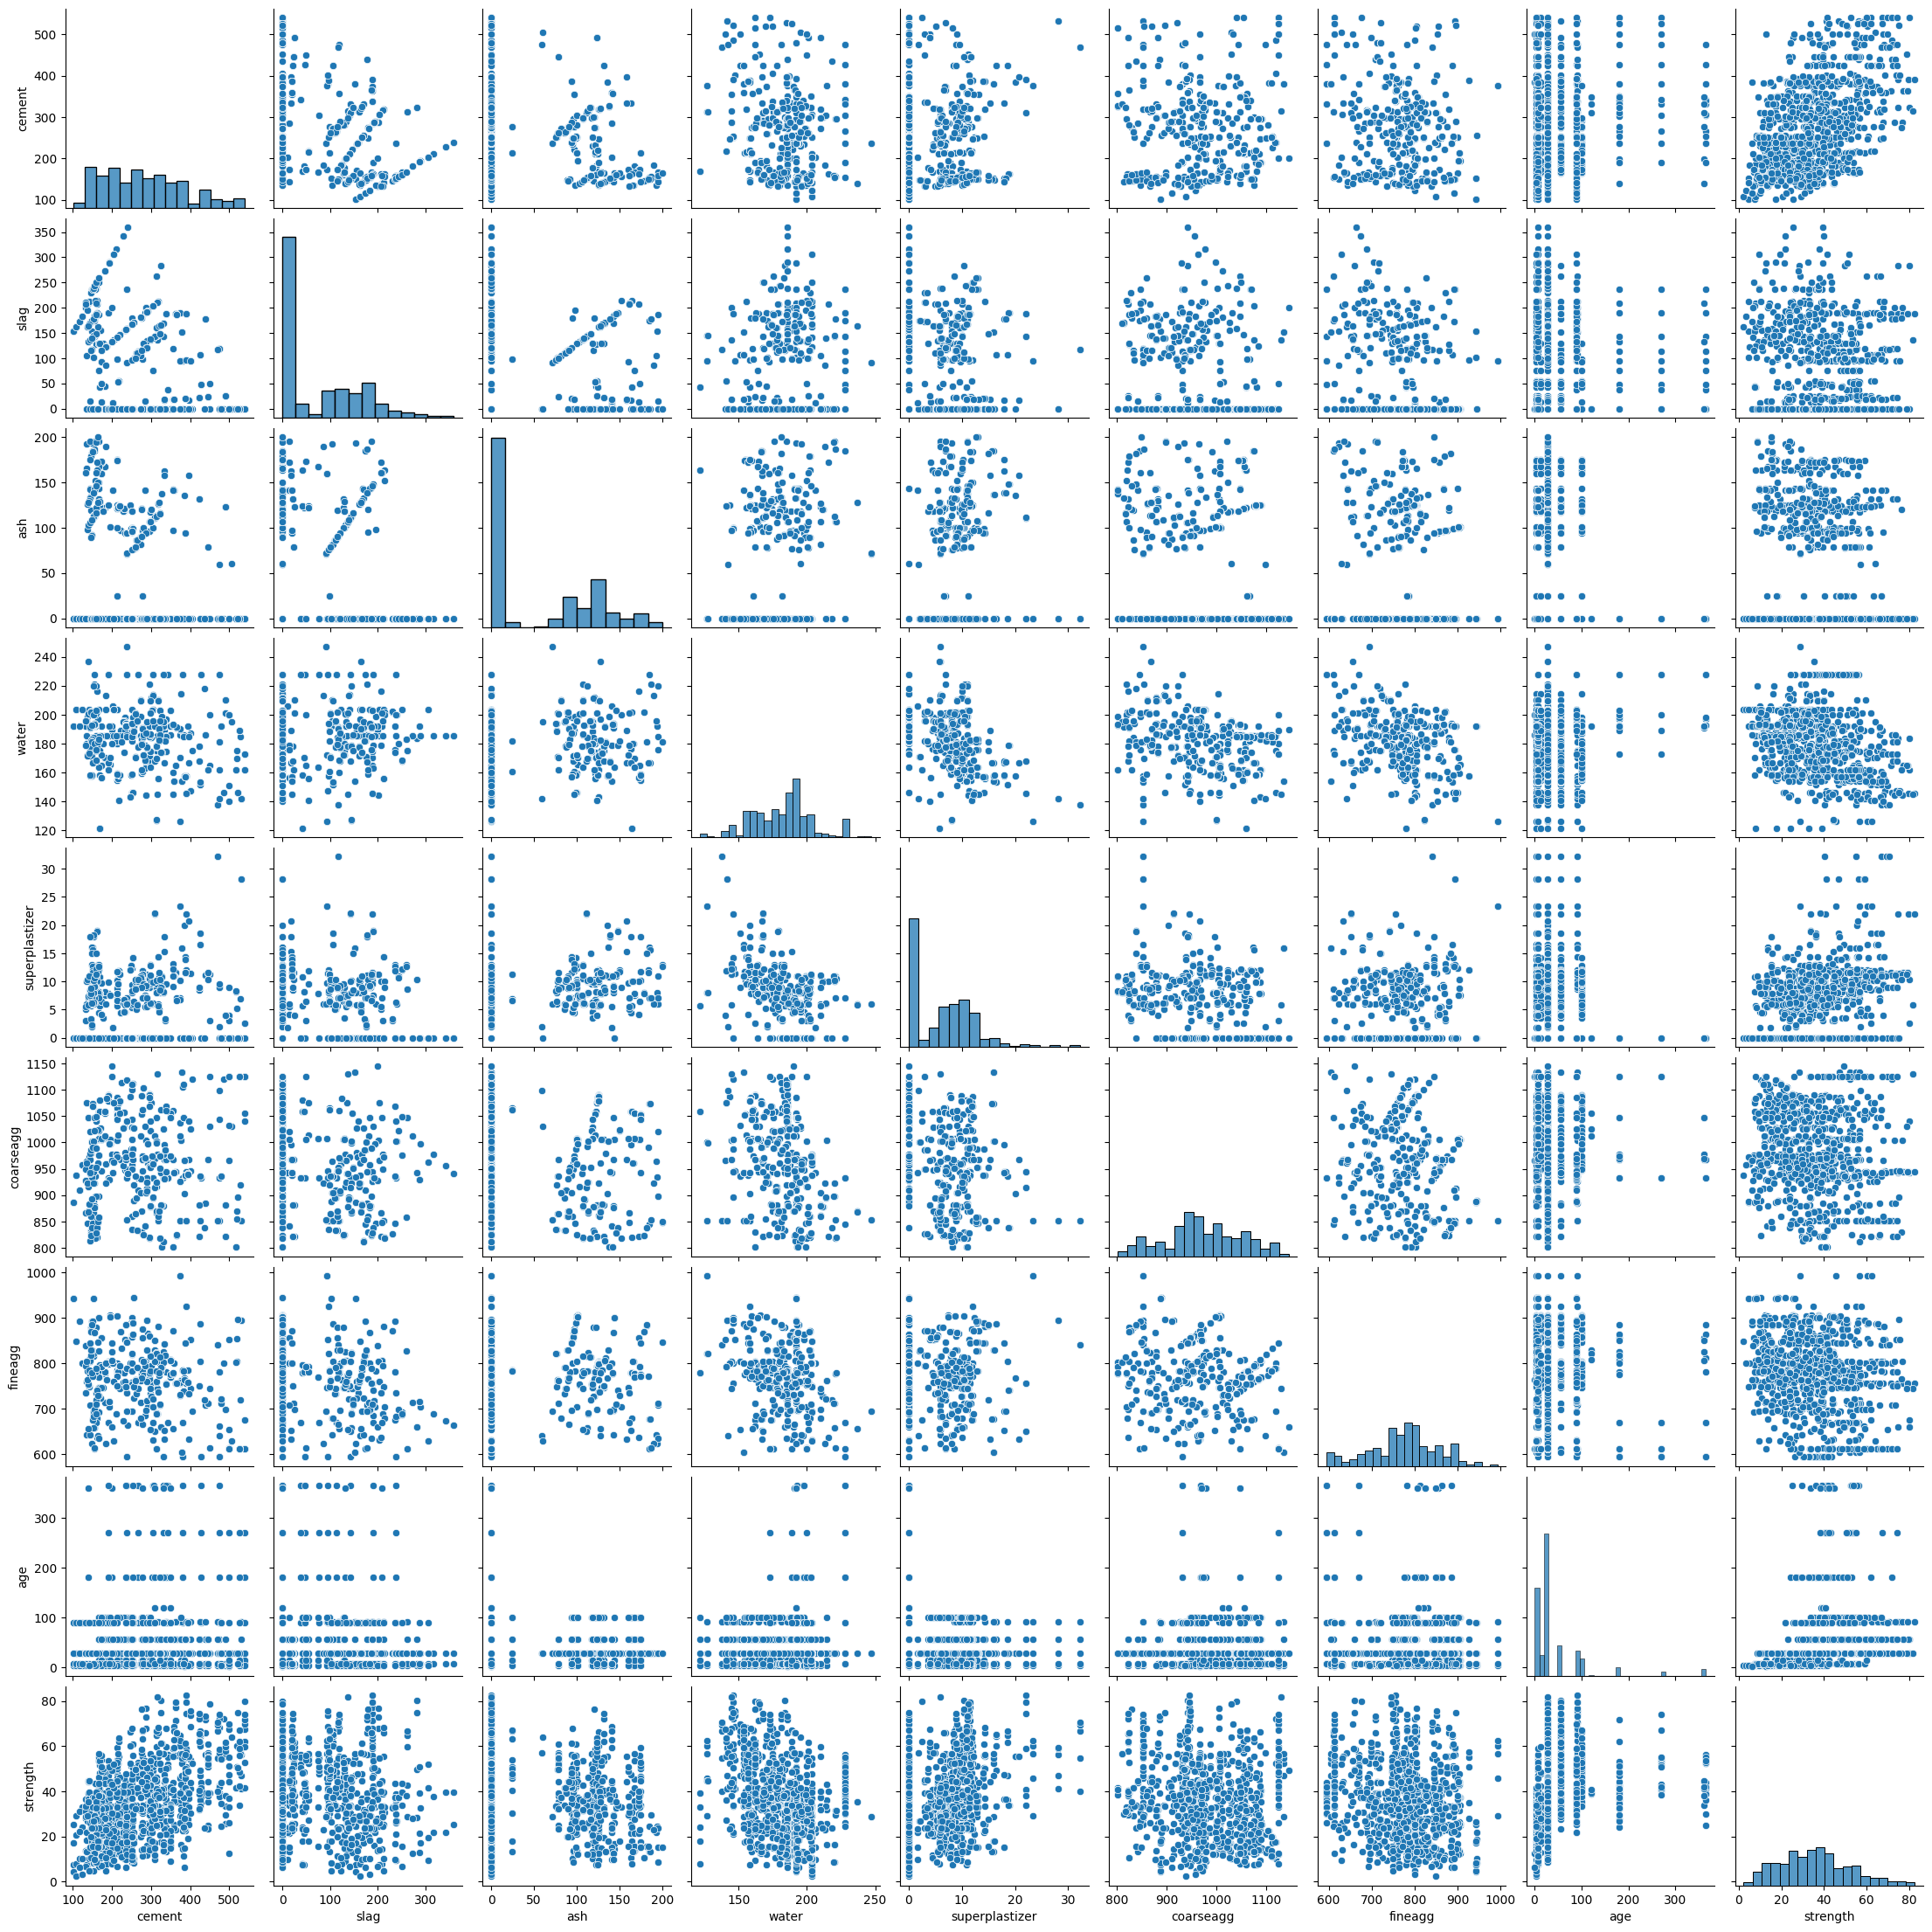

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(concrete)
plt.show()

Based on this pairplot, we can see that cement highly correlates with the concrete's compressive strength based on the linearity.

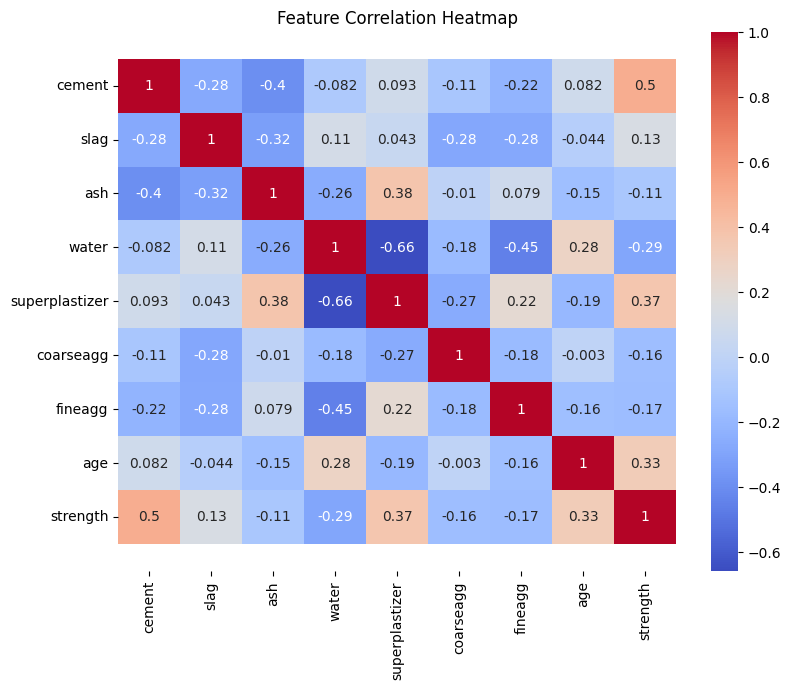

In [7]:
corr = concrete.corr()

plt.figure(figsize=(9, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

This heatmap proves our previous observations. Other features that highly correlates with the strength are superplastizer and age.

## 2. Data Preprocessing

### 2.1 Handle missing values or outliers

Check for null values.

In [8]:
concrete.isna().sum()

cement            0
slag              0
ash               0
water             0
superplastizer    0
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

There is no null value in the data. Noise has been filtered out beforehand.

### 2.2 Data preprocessing

Separating input features and target variable

In [9]:
X = concrete.iloc[:, :-1] # Features - all columns except the last
y = concrete.iloc[:, -1]  # Target - last column

Splitting data into training and test set using train_test_split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Perform standardization to rescale features to have a mean of 0 and standard deviation of 1.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Model Building

From EDA, we know that this is a problem of regression. Thus, we can try to evaluate some ML algorithms for regression such as linear regression, decision tree, and random forest.

### 3.1 Linear Regression

- Linear regression is the basic method of regression problems
- The algorithm assigns coefficients to each input feature to form a linear relation between input features and target variable, so as to minimize an objective function
- Objective function: MSE

In [12]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lr = LinearRegression()

# Fitting model on training data
lr.fit(X_train, y_train)

LinearRegression()

### 3.2 Decision Tree

- Decision tree is an another algorithm that would give better performance in our case due the zeroes in some of input features. 
- This would help decision tree to build trees based on some conditions on features which would improve performance

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree model
dt = DecisionTreeRegressor()

# Fitting model on training data
dt.fit(X_train, y_train)

DecisionTreeRegressor()

### 3.3 Random Forest

- Random forest works by ensembling more trees as in decision tree.
- It trains randomly initialized trees with a random subsets of data sampled from the training data, making the model more robust

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest model
rf = RandomForestRegressor(n_estimators=100)

# Fitting model on training data
rf.fit(X_train, y_train)

RandomForestRegressor()

## 4. Model Evaluation

### 4.1 Making predictions on test data

In [15]:
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

### 4.2 Comparing RMSE, MSE, MAE, and R2 Score

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Linear Regression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""Decision Tree     \t {:.2f} \t\t {:.2f}  \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dt)),mean_squared_error(y_test, y_pred_dt),
            mean_absolute_error(y_test, y_pred_dt), r2_score(y_test, y_pred_dt)))
print("""Random Forest     \t {:.2f} \t\t {:.2f}  \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rf)),mean_squared_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_rf), r2_score(y_test, y_pred_rf)))

Model			 RMSE 		 MSE 		 MAE 		 R2
Linear Regression 	 10.29 		 105.78 	8.23 		0.57
Decision Tree     	 7.35 		 53.99  	4.44 		0.78
Random Forest     	 5.08 		 25.82  	3.50 		0.90


## 5. Model Optimization

### 5.1 Perform cross-validation

In [17]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on Random Forest model
rf_scores = cross_val_score(rf, X, y, cv=10, scoring='neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-rf_scores)

print("Random Forest RMSE Scores:", rf_rmse_scores.mean())

Random Forest RMSE Scores: 7.045953129652135
